## ``Clustering``

However, when dealing with real-world problems, most of the time, data will not come with predefined labels, so we will want to develop machine learning models that can classify correctly this data, by finding by themselves some commonality in the features, that will be used to predict the classes on new data.

### ``Unsupervised Learning Analysis Process``

The overall process that we will follow when developing an unsupervised learning model can be summarized in the following chart:

<img src= 'b_img.png'>

**Unsupervised learning** main applications are:

-    Segmenting datasets by some shared atributes.
-    Detecting anomalies that do not fit to any group.
-    Simplify datasets by aggregating variables with similar atributes.

In summary, the main goal is to study the intrinsic (and commonly hidden) structure of the data.

This techniques can be condensed in two main types of problems that unsupervised learning tries to solve. This problems are:

### 1) Clustering
### 2) Dimensionality Reduction


<hr>

Cluster analysis, or clustering, is an unsupervised machine learning task.

In basic terms, the objective of clustering is to find different groups within the elements in the data. To do so, clustering algorithms find the structure in the data so that elements of the same cluster (or group) are more similar to each other than to those from different clusters.

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations. As such, it is often good practice to scale data prior to using clustering algorithms.

A list of 10 of the more popular algorithms is as follows:

-    Affinity Propagation
-    Agglomerative Clustering
-    BIRCH
-    DBSCAN
-    K-Means
-    Mini-Batch K-Means
-    Mean Shift
-    OPTICS
-    Spectral Clustering
-    Mixture of Gaussians

E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance) etc.

<hr>

# **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise )

Fundamentally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on **Density-based spatial clustering of applications with noise** (DBSCAN) clustering method.

Clusters are dense regions in the data space, separated by regions of the lower density of points. The **DBSCAN algorithm** is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

DBSCAN is a density-based clustered algorithm similar to mean-shift, but with a couple of notable advantages. 

DBSCAN Clustering involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

<img src = 'a_img.gif'>


### **How DBSCAN works?**

1.    DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).
2.    If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster). In both cases that point is marked as “visited”.
3.    For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.
4.    This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.
5.    Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point will have been marked as either belonging to a cluster or being noise.

### **DBSCAN Assigning Criteria**

It is based on a number of points with a specified radius ε and there is a special label assigned to each datapoint. The process of assigning this label is the following:

-    It is a specified number (MinPts) of neighbour points. A core point will be assigned if there is this MinPts number of points that fall in the ε radius.
-    A border point will fall in the ε radius of a core point, but will have less neighbors than the MinPts number.
-    Every other point will be noise points.

### **DBSCAN Algorithm**

The algorithm follows the logic:

1.    Identify a core point and make a group for each one, or for each connected gorup of core points (if they staisfy the criteria to be core point).
2.    Identify and assign border points to their respective core points.

The following figure summarize very well this process and the commented notation.

<img src = 'c_img.png'>

## **DBSCAN algorithm requires two parameters**

1.    **eps** : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the** k-distance graph**.
2.    **MinPts**: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

``In this algorithm, we have 3 types of data points.``

- **Core Point**: A point is a core point if it has more than MinPts points within eps.
- **Border Point**: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- **Noise or outlier**: A point which is not a core point or border point.

<img src = 'd_img.png'>

<hr>

### **DBSCAN algorithm can be abstracted in the following steps**

1.    Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.
2.    For each core point if it is not already assigned to a cluster, create a new cluster.
3.    Find recursively all its density connected points and assign them to the same cluster as the core point.
4.    A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.
5.    Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

### **Below is the DBSCAN clustering algorithm in pseudocode:**

```
DBSCAN(dataset, eps, MinPts){
# cluster index
C = 1
for each unvisited point p in dataset {
         mark p as visited
         # find neighbors
         Neighbors N = find the neighboring points of p

         if |N|>=MinPts:
             N = N U N'
             if p' is not a member of any cluster:
                 add p' to cluster C 
}
```

<hr>

### **Advantages**
-    We do not need to specify the number of clusters.
-    There is high flexibility in the shapes and sizes that the clusters may adopt.
-    It is very useful to identify and deal with noise data and outliers.

DBSCAN poses some great advantages over other clustering algorithms. Firstly, it does not require a pe-set number of clusters at all. It also identifies outliers as noises, unlike mean-shift which simply throws them into a cluster even if the data point is very different. Additionally, it can find arbitrarily sized and arbitrarily shaped clusters quite well.

Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real life data may contain irregularities, like –
- i) Clusters can be of arbitrary shape such as those shown in the figure below.
- ii) Data may contain noise.

### **Disadvantages**
-    It faces difficulties when dealing with boirder points that are reachable by two clusters.
-    It doesn’t find well clusters of varying densities.

The main drawback of DBSCAN is that it doesn’t perform as well as others when the clusters are of varying density. This is because the setting of the distance threshold ε and minPoints for identifying the neighborhood points will vary from cluster to cluster when the density varies. This drawback also occurs with very high-dimensional data since again the distance threshold ε becomes challenging to estimate.

<hr>

### **Comparing with K-Means**

**Disadvantage Of K-MEANS:**

1.    K-Means forms spherical clusters only. This algorithm fails when data is not spherical ( i.e. same variance in all directions).
<img src = 'e_img.png'>

2.    K-Means algorithm is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.
<img src = 'e_img.png'>

3.    K-Means algorithm requires one to specify the number of clusters a priory etc.

Basically, DBSCAN algorithm overcomes all the above-mentioned drawbacks of K-Means algorithm. DBSCAN algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

<hr>

# **PCA** (Principal Components Analysis)

### **What is PCA?**

Let’s say that you want to predict what the gross domestic product (GDP) of the United States will be for 2017. You have lots of information available: the U.S. GDP for the first quarter of 2017, the U.S. GDP for the entirety of 2016, 2015, and so on. You have any publicly-available economic indicator, like the unemployment rate, inflation rate, and so on. You have U.S. Census data from 2010 estimating how many Americans work in each industry and American Community Survey data updating those estimates in between each census. You know how many members of the House and Senate belong to each political party. You could gather stock price data, the number of IPOs occurring in a year, and how many CEOs seem to be mounting a bid for public office. Despite being an overwhelming number of variables to consider, this just scratches the surface.

TL;DR — you have a lot of variables to consider.

If you’ve worked with a lot of variables before, you know this can present problems. Do you understand the relationships between each variable? Do you have so many variables that you are in danger of overfitting your model to your data or that you might be violating assumptions of whichever modeling tactic you’re using?

You might ask the question, “How do I take all of the variables I’ve collected and focus on only a few of them?” In technical terms, you want to “reduce the dimension of your feature space.” By reducing the dimension of your feature space, you have fewer relationships between variables to consider and you are less likely to overfit your model. (Note: This doesn’t immediately mean that overfitting, etc. are no longer concerns — but we’re moving in the right direction!)

Somewhat unsurprisingly, **reducin**g the **dimension** of the feature space is called **“dimensionality reduction.”** There are many ways to achieve dimensionality reduction, but most of these techniques fall into one of two classes:

-    Feature Elimination
-    Feature Extraction

**Feature elimination** is what it sounds like: we reduce the feature space by eliminating features. In the GDP example above, instead of considering every single variable, we might drop all variables except the three we think will best predict what the U.S.’s gross domestic product will look like. Advantages of feature elimination methods include simplicity and maintaining interpretability of your variables.

As a disadvantage, though, you gain no information from those variables you’ve dropped. If we only use last year’s GDP, the proportion of the population in manufacturing jobs per the most recent American Community Survey numbers, and unemployment rate to predict this year’s GDP, we’re missing out on whatever the dropped variables could contribute to our model. By eliminating features, we’ve also entirely eliminated any benefits those dropped variables would bring.

**Feature extraction**, however, doesn’t run into this problem. Say we have ten independent variables. In feature extraction, we create ten “new” independent variables, where each “new” independent variable is a combination of each of the ten “old” independent variables. However, we create these new independent variables in a specific way and order these new variables by how well they predict our dependent variable.

You might say, “Where does the dimensionality reduction come into play?” Well, we keep as many of the new independent variables as we want, but we drop the “least important ones.” Because we ordered the new variables by how well they predict our dependent variable, we know which variable is the most important and least important. But — and here’s the kicker — because these new independent variables are combinations of our old ones, we’re still keeping the most valuable parts of our old variables, even when we drop one or more of these “new” variables!

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables! As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. If we decide to fit a linear regression model with these “new” variables (see “principal component regression” below), this assumption will necessarily be satisfied.

### **When should I use PCA?**

1.    Do you want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
2.    Do you want to ensure your variables are independent of one another?
3.    Are you comfortable making your independent variables less interpretable?

If you answered “yes” to all three questions, then PCA is a good method to use. If you answered “no” to question 3, you **should not** use PCA.

<hr>

# **Simple Dataset**

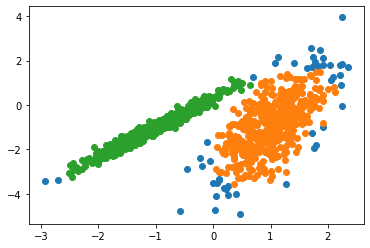

In [1]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

<hr>

# **Credit Card Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

### **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

### **Loading Dataset**

In [2]:
df = pd.read_csv('CC GENERAL.csv') 
  
# Dropping the CUST_ID column from the data 
df = df.drop('CUST_ID', axis = 1) 
  
df.shape

(8950, 17)

In [3]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
# Handling the missing values 
df.dropna(inplace=True)
  
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [17]:
df.isna().sum()

### **Preprocessing the data**

In [6]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
df_normalized = normalize(df_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
df_normalized = pd.DataFrame(df_normalized) 
df_normalized.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320


### **PCA : Reducing the dimensionality of the data to make it visualizable**

In [41]:
pca = PCA(n_components = 5) 
df_principal = pca.fit_transform(df) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2', 'P3', 'P4', 'P5'] 
df_principal.head()

,P1,P2,P3,P4,P5
0,-4391.447490,911.247469,216.280956,-158.254882,60.148218
1,4044.634211,-2565.160177,2127.389657,-3978.111284,82.579017
2,1418.394845,-1924.557181,-2194.007989,1119.516519,-301.242412
3,-3809.046707,728.326687,528.642293,-240.953140,-235.710497
4,-1966.891227,850.605183,1981.805120,1477.687397,-219.841322


In [42]:
# Information ratio in PCA result
pca.explained_variance_ratio_

array([0.47493166, 0.17814415, 0.1401677 , 0.1146871 , 0.04723626])

**We can inverse transform**

In [43]:
#let's try in index 0
df_back_to_normal = pca.inverse_transform(df_principal)[0]

In [44]:
# inverse transform df_principal
IV = scaler.inverse_transform(df_back_to_normal)
pd.DataFrame(IV)

,0
0,8.845302e+04
1,1.073640e+00
2,2.472488e+05
3,-5.940546e+04
4,1.376606e+05
5,1.520160e+04
6,6.813036e-01
7,2.427548e-01
8,5.085973e-01
9,1.544407e-01


In [45]:
# we can compare it with original dataset
df.iloc[0]

BALANCE                               40.900749
BALANCE_FREQUENCY                      0.818182
PURCHASES                             95.400000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                95.400000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.166667
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.083333
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          2.000000
CREDIT_LIMIT                        1000.000000
PAYMENTS                             201.802084
MINIMUM_PAYMENTS                     139.509787
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
Name: 0, dtype: float64

### **Building the clustering model**

In [18]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(df_principal) 
labels = db_default.labels_ 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
pd.DataFrame(labels)[0].unique()

array([ 0, -1,  1,  2], dtype=int32)

### **Visualizing the clustering**

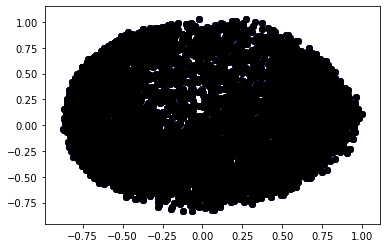

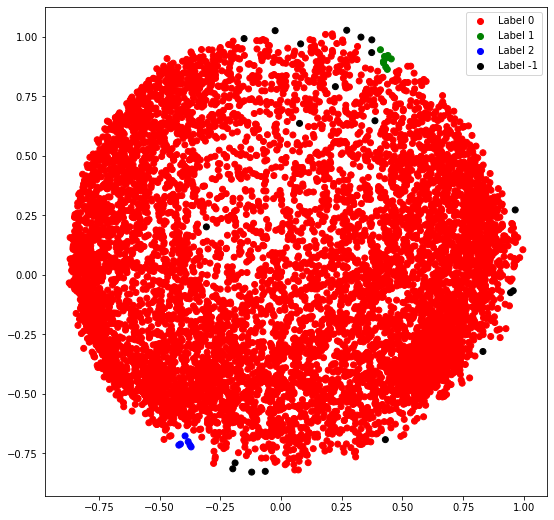

In [9]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_principal['P1'], df_principal['P2'], color ='r'); 
g = plt.scatter(df_principal['P1'], df_principal['P2'], color ='g'); 
b = plt.scatter(df_principal['P1'], df_principal['P2'], color ='b'); 
k = plt.scatter(df_principal['P1'], df_principal['P2'], color ='k'); 
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 
  
plt.show() 

### **Tuning the parameters of the model**

In [10]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(df_principal) 
labels1 = db.labels_ 

In [31]:
pd.DataFrame(labels1)[0].unique()

array([-1,  3,  1,  0,  2,  4,  5], dtype=int32)

### **Visualizing the changes**

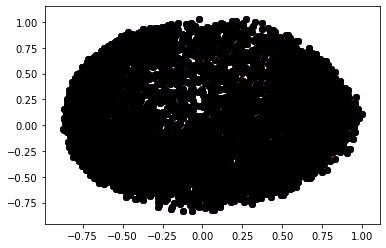

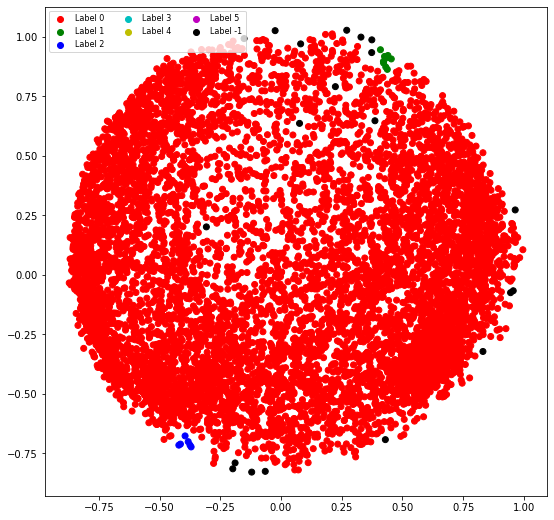

In [11]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter(df_principal['P1'], df_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(df_principal['P1'], df_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show() 

# **Take Home Exercise**
- Gunakan K-Means pada data di atas, lalu bandingkan hasil clusteringnya!

# **Reference**:
- Rishav Kumar, "Understanding Principal Component Analysis", https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
- Chathurangi Shyalika, "Understanding Principal Components Analysis(PCA)", https://medium.com/datadriveninvestor/principal-components-analysis-pca-71cc9d43d9fb
- Matt Brems, "A One-Stop Shop for Principal Component Analysis", https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
- Sydney Firmin, "Tidying up with PCA: An Introduction to Principal Components Analysis", https://towardsdatascience.com/tidying-up-with-pca-an-introduction-to-principal-components-analysis-f876599af383
- George Seif, "The 5 Clustering Algorithms Data Scientists Need to Know", https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
- Jason Brownlee, "10 Clustering Algorithms With Python", https://machinelearningmastery.com/clustering-algorithms-with-python/
- Victor Roman, "Unsupervised Machine Learning: Clustering Analysis", https://towardsdatascience.com/unsupervised-machine-learning-clustering-analysis-d40f2b34ae7e
- Debomit Dey, "DBSCAN Clustering in ML | Density based clustering", https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
- Dataset Source: https://www.kaggle.com/arjunbhasin2013/ccdata